<a href="https://colab.research.google.com/github/myounes21/NYC_Taxi_Trip_Duration_Prediction/blob/main/NYC_taxi_trip_duration_prediction_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading & Understanding the data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630126953125,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481201171875,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005332946777344,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.01226806640625,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923278808594,40.782520,N,435.0


In [ ]:
df.shape

(15251, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15251 entries, 0 to 15250
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  15251 non-null  object 
 1   vendor_id           15251 non-null  int64  
 2   pickup_datetime     15251 non-null  object 
 3   dropoff_datetime    15251 non-null  object 
 4   passenger_count     15251 non-null  int64  
 5   pickup_longitude    15251 non-null  float64
 6   pickup_latitude     15251 non-null  float64
 7   dropoff_longitude   15251 non-null  object 
 8   dropoff_latitude    15250 non-null  float64
 9   store_and_fwd_flag  15250 non-null  object 
 10  trip_duration       15250 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_latitude,trip_duration
count,15251.000000,15251.000000,15251.000000,15251.000000,15250.000000,15250.000000
mean,1.530654,1.673857,-73.973615,40.751296,40.751915,922.626557
std,0.499076,1.322486,0.037579,0.027705,0.032590,2892.885406
min,1.000000,1.000000,-74.209854,40.604431,40.567341,2.000000
25%,1.000000,1.000000,-73.991776,40.737782,40.735749,395.000000
50%,2.000000,1.000000,-73.981804,40.754677,40.754707,658.000000
75%,2.000000,2.000000,-73.966934,40.768398,40.770235,1063.750000
max,2.000000,6.000000,-73.558289,40.882942,41.311520,86357.000000


# 2. Cleaning the data

In [ ]:
data = df.copy()

In [ ]:
data.isna().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,1
store_and_fwd_flag,1


In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

,0
id,0.000000
vendor_id,0.000000
pickup_datetime,0.000000
dropoff_datetime,0.000000
passenger_count,0.000000
pickup_longitude,0.000000
pickup_latitude,0.000000
dropoff_longitude,0.000000
dropoff_latitude,0.006557
store_and_fwd_flag,0.006557


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [ ]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime = pd.to_datetime(data.dropoff_datetime)

In [ ]:
data[['pickup_datetime', 'dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15250 entries, 0 to 15249
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup_datetime   15250 non-null  datetime64[ns]
 1   dropoff_datetime  15250 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 357.4 KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data[data['trip_duration'] <= 0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [ ]:
data['passenger_count'].unique()


array([1, 6, 4, 2, 3, 5])

In [ ]:
data['trip_duration_minutes'] = (data['trip_duration'] / 60).astype(int)

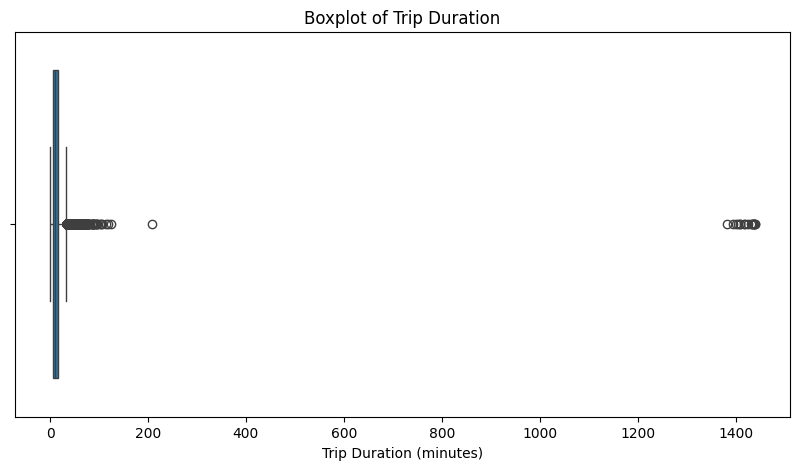

In [ ]:
# check if there are outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=data['trip_duration_minutes'])
plt.xlabel('Trip Duration (minutes)')
plt.title('Boxplot of Trip Duration')
plt.show()


In [ ]:
# Calculating the 95th, 99th, and 99.9th percentiles of trip duration (in minutes)
data['trip_duration_minutes'].quantile([0.95, 0.99, 0.999])

,trip_duration_minutes
0.950,34.000
0.990,54.000
0.999,1391.261


95% of trips are under 35 minutes → Most trips are short.  
99% of trips are under 55 minutes → Almost all normal trips fit here.  
99.9% of trips are under 1386 minutes (~23 hours!) → A few extreme outliers exist.

In [ ]:
data = data[data.trip_duration_minutes < 55]

In [ ]:
data.shape

(15107, 12)

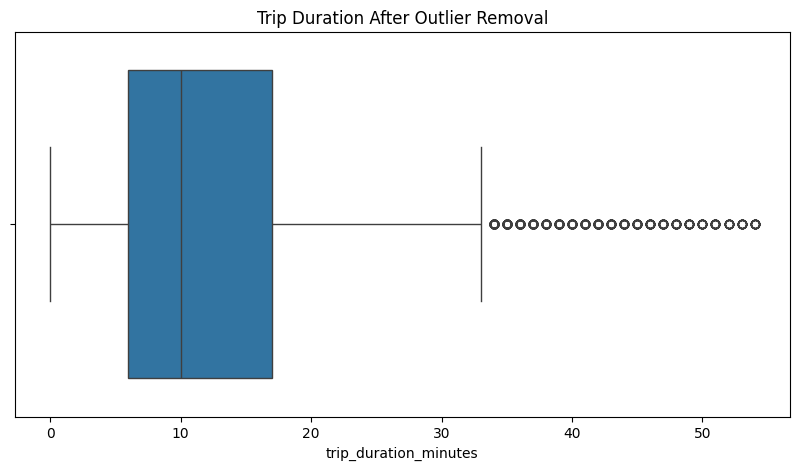

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['trip_duration_minutes'])
plt.title("Trip Duration After Outlier Removal")
plt.show()

# 3. Feature Engineering

In [ ]:
# Extracting time-based features
data['pickup_hour'] = data.pickup_datetime.dt.hour
data['pickup_day'] = data.pickup_datetime.dt.day_of_week
data['pickup_day_of_year'] = data.pickup_datetime.dt.day_of_year

In [ ]:
# Create Distance Feature
from geopy.distance import geodesic

def haversine_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km  # Distance in km

data['trip_distance_km'] = data.apply(haversine_distance, axis=1)


In [ ]:
# Calculating the average speed of the trip in km/h
data['avg_speed_kmh'] = data.trip_distance_km / (data.trip_duration_minutes / 60)

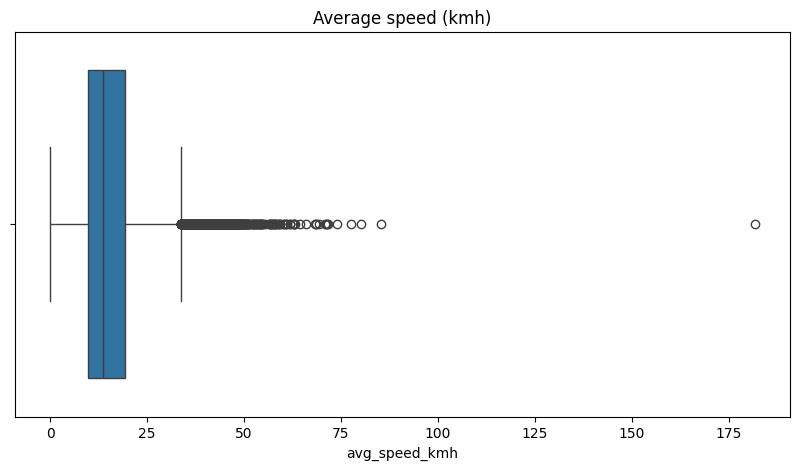

In [ ]:
# check if there are outliers in speed
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['avg_speed_kmh'])
plt.title("Average speed (kmh)")
plt.show()

In [ ]:
threshold = data['avg_speed_kmh'].quantile(0.95)
threshold

33.27383915443651

In [ ]:
data = data[data['avg_speed_kmh'] < threshold]

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_minutes', 'pickup_hour', 'pickup_day',
       'pickup_day_of_year', 'trip_distance_km', 'avg_speed_kmh'],
      dtype='object')

# 4. Data Visualization & Insights

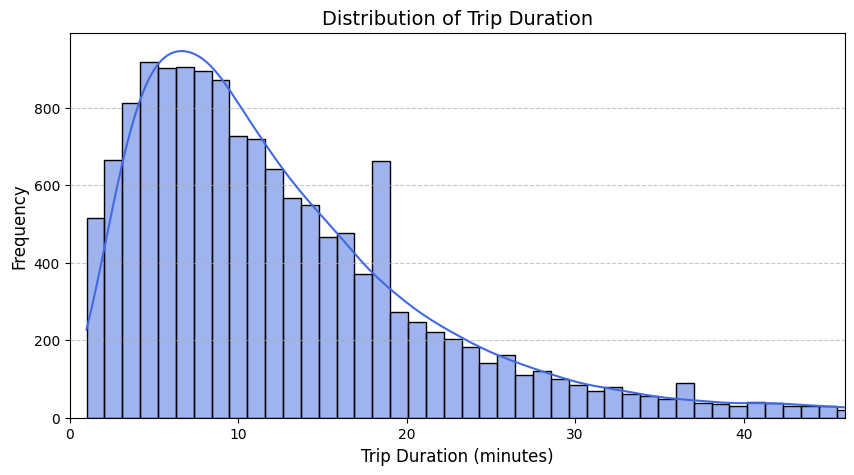

In [ ]:
# Trip duration distribution

plt.figure(figsize=(10, 5))
sns.histplot(data['trip_duration_minutes'], bins=50, kde=True, color='royalblue')

plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Trip Duration", fontsize=14)
plt.xlim(0, data['trip_duration_minutes'].quantile(0.99))  # Focus on 99% of data (remove extreme outliers)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

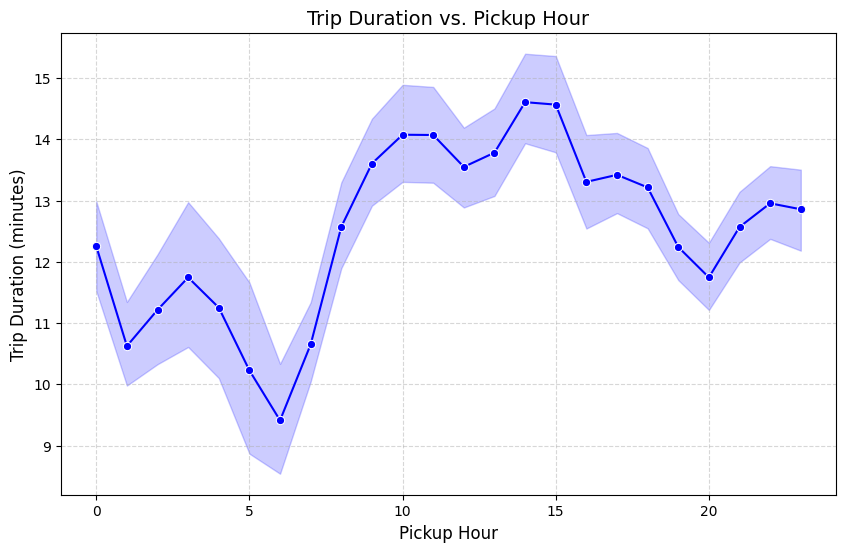

In [ ]:
# Trip duration vs pickup hour

plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='trip_duration_minutes', data=data, marker="o", color="b")
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Trip Duration (minutes)", fontsize=12)
plt.title("Trip Duration vs. Pickup Hour", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

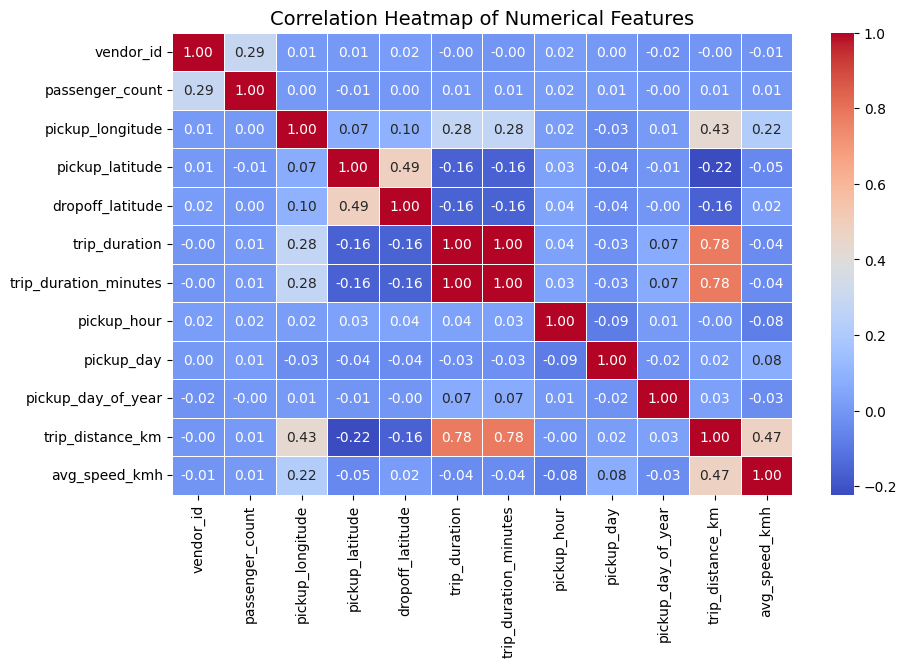

In [ ]:
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

# 5. Pre-Modeling

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['trip_duration','trip_duration_minutes', 'id', 'pickup_datetime', 'dropoff_datetime'], axis=1)
y = data['trip_duration_minutes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.2
)

# Convert categorical columns to string (optional, to prevent dtype issues)
X_train['vendor_id'] = X_train['vendor_id'].astype(str)
X_test['vendor_id'] = X_test['vendor_id'].astype(str)

# Encode 'vendor_id' and 'store_and_fwd_flag' separately
le_vendor = LabelEncoder()
X_train['vendor_id'] = le_vendor.fit_transform(X_train['vendor_id'])
X_test['vendor_id'] = le_vendor.transform(X_test['vendor_id'])

le_store = LabelEncoder()
X_train['store_and_fwd_flag'] = le_store.fit_transform(X_train['store_and_fwd_flag'])
X_test['store_and_fwd_flag'] = le_store.transform(X_test['store_and_fwd_flag'])

# Scale features (Don't scale y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_train.isin([np.inf, -np.inf]).sum())  # Count infinities
print(X_train.isna().sum())  # Count NaNs

print(X_test.isin([np.inf, -np.inf]).sum())  # Count infinities
print(X_test.isna().sum())  # Count NaNs

vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
pickup_hour           0
pickup_day            0
pickup_day_of_year    0
trip_distance_km      0
avg_speed_kmh         0
dtype: int64
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
pickup_hour           0
pickup_day            0
pickup_day_of_year    0
trip_distance_km      0
avg_speed_kmh         0
dtype: int64
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
pickup_hour           0
pickup_day            0
pickup_day_of_year    0
trip_distance_km      0
avg_speed_kmh         0
dtype: int64
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
d

In [ ]:
print("Mean:", np.mean(X_train_scaled))
print("Std Dev:", np.std(X_train_scaled))

Mean: 1.0139314358413028e-14
Std Dev: 1.0


# 5. Model Training & Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{name} Cross-Validation R² Scores: {scores}")
    print(f"Mean R² Score: {scores.mean():.4f}")

Linear Regression Cross-Validation R² Scores: [0.8237131  0.8129138  0.83330844 0.81489315 0.8278101 ]
Mean R² Score: 0.8225
Decision Tree Cross-Validation R² Scores: [0.97886659 0.96168387 0.9803079  0.9723368  0.98465364]
Mean R² Score: 0.9756
Random Forest Cross-Validation R² Scores: [0.98230459 0.98162433 0.98991588 0.98794985 0.98744199]
Mean R² Score: 0.9858


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for RandomForestRegressor
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

Best Random Forest Parameters: {'max_depth': 20, 'n_estimators': 200}


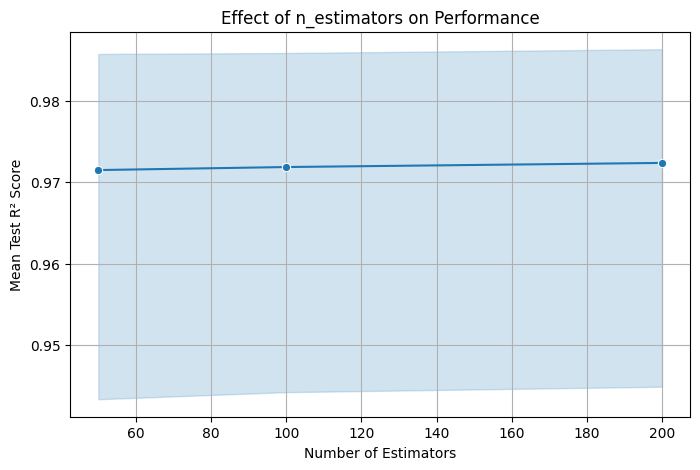

In [ ]:
# Plot n_estimators vs R² score
# Convert GridSearchCV results to a DataFrame
cv_results = pd.DataFrame(grid_search_rf.cv_results_)

# Convert hyperparameters to integer type for plotting
cv_results["param_n_estimators"] = cv_results["param_n_estimators"].astype(int)
cv_results["param_max_depth"] = cv_results["param_max_depth"].astype(int)

# Plot n_estimators vs Mean Test R² Score
plt.figure(figsize=(8, 5))
sns.lineplot(x=cv_results["param_n_estimators"], y=cv_results["mean_test_score"], marker="o")
plt.title("Effect of n_estimators on Performance")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test R² Score")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

best_model = grid_search_rf.best_estimator_

y_pred = best_model.predict(X_test_scaled)
print("Test Set R² Score:", r2_score(y_test, y_pred))
print("Test Set MSE:", mean_squared_error(y_test, y_pred))

Test Set R² Score: 0.9924574002957421
Test Set MSE: 0.6439148995476911


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

               Feature  Importance
10    trip_distance_km    0.712425
11       avg_speed_kmh    0.279608
5     dropoff_latitude    0.001611
3      pickup_latitude    0.001366
9   pickup_day_of_year    0.001266
4    dropoff_longitude    0.000940
2     pickup_longitude    0.000748
8           pickup_day    0.000722
7          pickup_hour    0.000663
1      passenger_count    0.000347
0            vendor_id    0.000157
6   store_and_fwd_flag    0.000148


In [ ]:
# Keep only the top 2 features
top_features = ['trip_distance_km', 'avg_speed_kmh']

# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Create new datasets with only these features
X_train_selected = X_train_scaled_df[top_features]
X_test_selected = X_test_scaled_df[top_features]

In [ ]:
best_model.fit(X_train_selected, y_train)

# Evaluate performance
y_pred = best_model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R² Score: {r2:.4f}")

MSE: 0.5522, R² Score: 0.9935


## Conclusion

In this project, I explored the NYC Taxi Trip Duration dataset to build a predictive model for trip duration. Below are the key steps taken:

1. **Data Preprocessing:**  
   - Loaded and examined the dataset.  
   - Handled missing values and outliers.  
   - Created new features such as `trip_distance_km` and `avg_speed_kmh`.  
   - Scaled numerical features for better model performance.  

2. **Feature Selection:**  
   - Performed feature importance analysis using Random Forest.  
   - Identified `trip_distance_km` and `avg_speed_kmh` as the most significant features.  
   - Reduced the dataset to only the most relevant features.  

3. **Model Training & Evaluation:**  
   - Compared multiple models (Linear Regression, Decision Tree, and Random Forest).  
   - Used **cross-validation** to evaluate model performance.  
   - Fine-tuned the Random Forest model using **GridSearchCV** to optimize hyperparameters.  

4. **Results & Insights:**  
   - Random Forest outperformed other models with better R² scores.  
   - Visualized hyperparameter tuning results to understand model behavior.  
   - The final model effectively predicts trip duration based on key trip features.  

This project demonstrated the end-to-end machine learning workflow, from **data exploration** to **model optimization**, providing valuable insights into taxi trip durations.  

---
